<a href="https://colab.research.google.com/github/mnaufalmubarik/Heart-Disease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALL THE PACKAGE

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
#IMPORT DATA
import pandas as pd
import numpy as np
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn import datasets
#Split Data
from sklearn.model_selection import train_test_split
#Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
#Optimization
import optuna
#Save Model
from keras.models import load_model
#TESTING
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

IMPORT THE DATASET

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS2uuIdA8LMwACftOWAvQVCaKJW4La1C8L4fTSQQHZkA3AKGLFic2YVmdAkgtd2eorFxPA2tC-k-8hF/pub?output=csv")
print(data)

      x1  x2  x3   x4   x5  x6  x7   x8  x9  x10  x11  x12  x13  y
0     52   1   0  125  212   0   1  168   0  1.0    2    2    3  0
1     53   1   0  140  203   1   0  155   1  3.1    0    0    3  0
2     70   1   0  145  174   0   1  125   1  2.6    0    0    3  0
3     61   1   0  148  203   0   1  161   0  0.0    2    1    3  0
4     62   0   0  138  294   1   1  106   0  1.9    1    3    2  0
...   ..  ..  ..  ...  ...  ..  ..  ...  ..  ...  ...  ...  ... ..
1020  59   1   1  140  221   0   1  164   1  0.0    2    0    2  1
1021  60   1   0  125  258   0   0  141   1  2.8    1    1    3  0
1022  47   1   0  110  275   0   0  118   1  1.0    1    1    2  0
1023  50   0   0  110  254   0   0  159   0  0.0    2    0    2  1
1024  54   1   0  120  188   0   1  113   0  1.4    1    1    3  0

[1025 rows x 14 columns]


DROP THE DUPLICATES

In [ ]:
clean = data.drop_duplicates()
print(clean)

     x1  x2  x3   x4   x5  x6  x7   x8  x9  x10  x11  x12  x13  y
0    52   1   0  125  212   0   1  168   0  1.0    2    2    3  0
1    53   1   0  140  203   1   0  155   1  3.1    0    0    3  0
2    70   1   0  145  174   0   1  125   1  2.6    0    0    3  0
3    61   1   0  148  203   0   1  161   0  0.0    2    1    3  0
4    62   0   0  138  294   1   1  106   0  1.9    1    3    2  0
..   ..  ..  ..  ...  ...  ..  ..  ...  ..  ...  ...  ...  ... ..
723  68   0   2  120  211   0   0  115   0  1.5    1    0    2  1
733  44   0   2  108  141   0   1  175   0  0.6    1    0    2  1
739  52   1   0  128  255   0   1  161   1  0.0    2    1    3  0
843  59   1   3  160  273   0   0  125   0  0.0    2    0    2  0
878  54   1   0  120  188   0   1  113   0  1.4    1    1    3  0

[302 rows x 14 columns]


CHECK MISSING DATA

In [ ]:
# Mengecek missing data pada DataFrame
missing_data = clean.isnull().sum()

# Menampilkan hasil
print(missing_data)

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
y      0
dtype: int64


SUMMARY

In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      302 non-null    int64  
 1   x2      302 non-null    int64  
 2   x3      302 non-null    int64  
 3   x4      302 non-null    int64  
 4   x5      302 non-null    int64  
 5   x6      302 non-null    int64  
 6   x7      302 non-null    int64  
 7   x8      302 non-null    int64  
 8   x9      302 non-null    int64  
 9   x10     302 non-null    float64
 10  x11     302 non-null    int64  
 11  x12     302 non-null    int64  
 12  x13     302 non-null    int64  
 13  y       302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


OUTLIER DETECTION

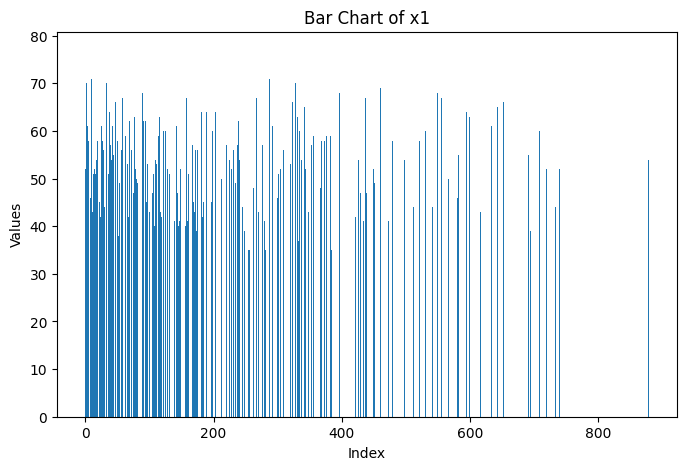

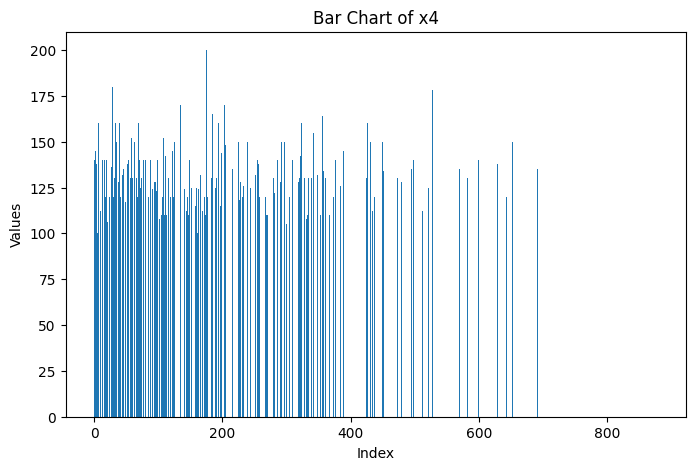

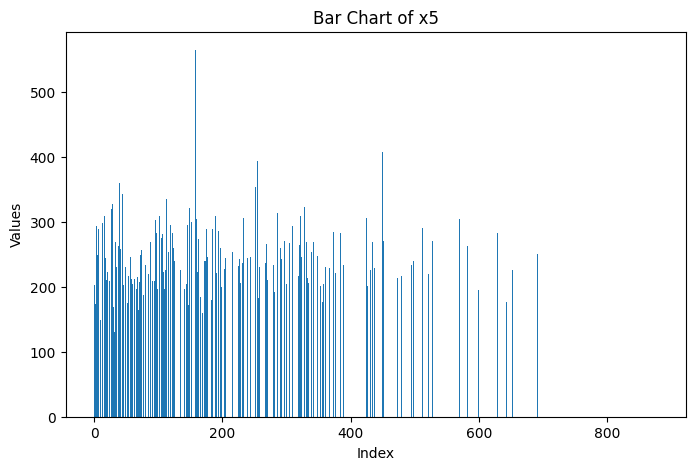

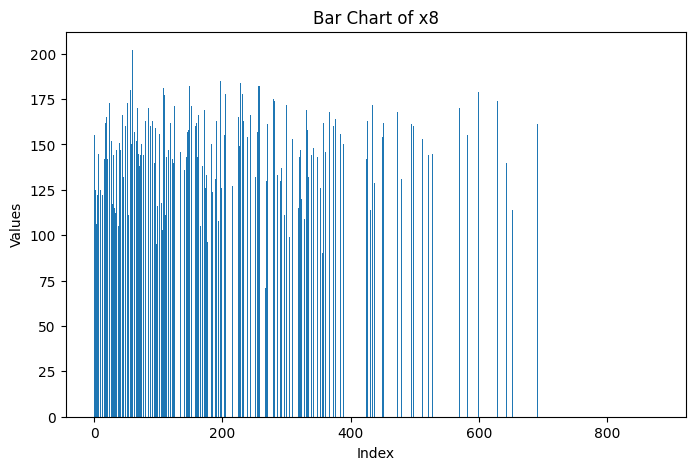

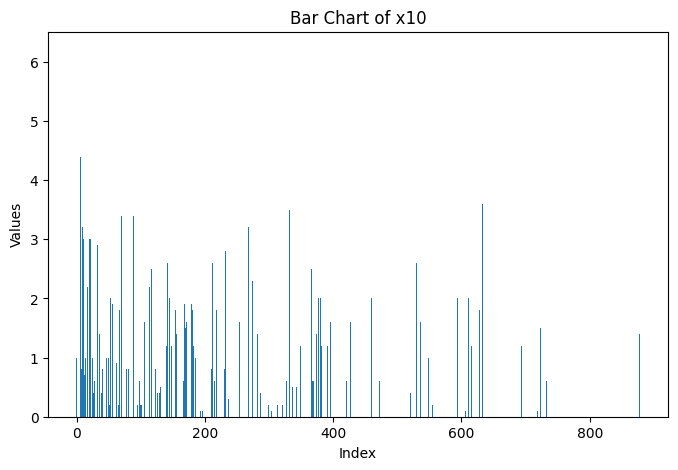

In [ ]:
# Select columns x1, x4, x5, x8, x10
selected_columns = ['x1', 'x4', 'x5', 'x8', 'x10']
selected_data = clean[selected_columns]

# Plotting individual bar charts for each column
for column in selected_columns:
    plt.figure(figsize=(8, 5))
    plt.bar(clean.index, clean[column])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

IMBALANCED DATA IDENTIFICATION

<ipython-input-8-cb0080f20f54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['y'] = clean['y'].replace({1: 'Yes', 0: 'No'})


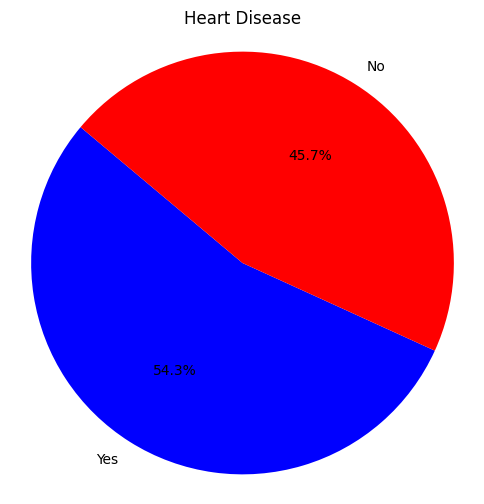

In [ ]:
import matplotlib.pyplot as plt
# Rename variables
clean['y'] = clean['y'].replace({1: 'Yes', 0: 'No'})

# Count the label of the variable
kategori_counts = clean['y'].value_counts()



# Pie chart
labels = kategori_counts.index
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.axis('equal')
plt.title('Heart Disease')
plt.show()

SPLIT SET

In [ ]:
#Define
y = clean.y
X = clean.drop(['y'], axis=1)
#Split
split = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

OPTIMUM MODEL BUILDING

In [ ]:
#PARAMETER TRIAL
def objective(trial):
    # Split
    split

    # Define the trial
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42

    }

    # Inisialization
    model = ExtraTreesClassifier(**params)

    # Model building from training data
    model.fit(X_train, y_train)

    # Validation score
    score = model.score(X_test, y_test)
    return score

# Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best parameter review
best_params = study.best_params
print("Parameter terbaik:", best_params)

[I 2023-12-22 14:56:39,429] A new study created in memory with name: no-name-5aed1500-97c3-4b45-a2dc-a4a0232132b5
[I 2023-12-22 14:56:40,530] Trial 0 finished with value: 0.8360655737704918 and parameters: {'n_estimators': 274, 'max_depth': 66, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8360655737704918.
[I 2023-12-22 14:56:43,639] Trial 1 finished with value: 0.8360655737704918 and parameters: {'n_estimators': 565, 'max_depth': 61, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8360655737704918.
[I 2023-12-22 14:56:44,545] Trial 2 finished with value: 0.8524590163934426 and parameters: {'n_estimators': 258, 'max_depth': 91, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.8524590163934426.
[I 2023-12-22 14:56:45,360] Trial 3 finished with value: 0.819672131147541 and parameters: {'n_estimators': 238, 'max_depth': 84, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with value:

Parameter terbaik: {'n_estimators': 258, 'max_depth': 91, 'min_samples_split': 4, 'min_samples_leaf': 3}


BEST MODEL

In [ ]:
# Membuat model dengan parameter optimum
best_et_params = {
    'n_estimators': 258,
    'max_depth': 91,
    'min_samples_split': 4,
    'min_samples_leaf': 3,
    'random_state': 42
}
best_et_classifier = ExtraTreesClassifier(**best_et_params)

# Membangun model dengan parameter optimum
model_etr = best_et_classifier.fit(X_train, y_train)

TRAINING PERFROMANCE

Akurasi: 0.941908713692946


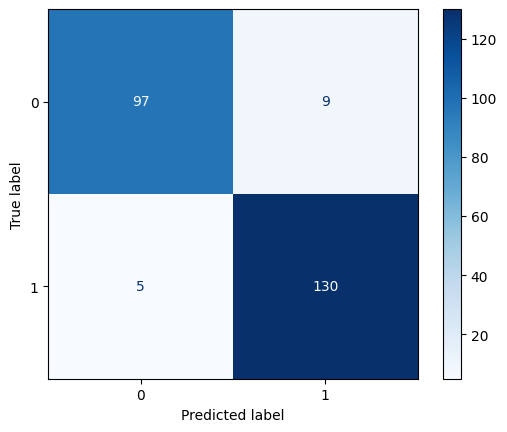

In [ ]:
# Prediksi pada data training
y_mod = best_et_classifier.predict(X_train)

# Akurasi model
accuracy = accuracy_score(y_train, y_mod)
print(f"Akurasi: {accuracy}")

# Confusion Matrix
cm = confusion_matrix (y_train, y_mod)
disp = ConfusionMatrixDisplay (confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

TESTING PERFORMANCE

Akurasi: 0.8524590163934426


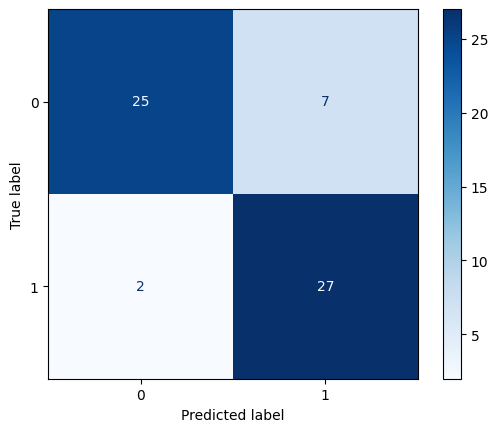

In [ ]:
# Prediksi pada data testing
y_pred = best_et_classifier.predict(X_test)

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Confusion Matrix
cm = confusion_matrix (y_test, y_pred)
disp = ConfusionMatrixDisplay (confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()